This experiment is to check how to identify if the two given frames are similar or not.

## What qualifies as similar frames?
- Only cursor moved
- Scribbles on the frames
- Only slight changes of text (less than one sentence)

In [1]:
import sys
fp = "/media/vedant/New Volume/DPythonProjects/yt_summarizer"

sys.path.insert(1, fp)   
fp = "/media/vedant/New Volume/DPythonProjects/yt_summarizer/v2"

sys.path.insert(1, fp)   

from v2.helper import Helper

Helper.log("Hello, world!")


Hello, world!


In [2]:
from v2.ocr_approval.pixel_comparison_ocr_approval_strategy import PixelComparisonOCRApprovalStrategy

In [3]:
'''old_frame_path = "data/frame_1530.jpg"
new_frame_path = "data/frame_2160.jpg"'''

# negatives 
old_frame_path = "data/negatives/frame_3600.jpg"
new_frame_path = "data/negatives/frame_5040.jpg"

In [4]:
import cv2

In [5]:
old_frame = cv2.imread(old_frame_path)
new_frame = cv2.imread(new_frame_path)

In [6]:
PixelComparisonOCRApprovalStrategy().permit_ocr(new_frame, old_frame)

False

In [7]:
import pandas as pd

In [8]:
# directory = "data/dhmumc_frames"
# directory = "data/rnhlpj_peak_frames"
directory = "data/hfuitn_extracted_frames"

In [9]:
import os

In [10]:

all_frames = os.listdir(directory)
all_frames[:2]

['frame_11160.jpg', 'frame_12150.jpg']

In [11]:
full_frames = [os.path.join("data", directory, all_frames[i]) for i in range(len(all_frames))]
full_frames[:2]

['data/data/hfuitn_extracted_frames/frame_11160.jpg',
 'data/data/hfuitn_extracted_frames/frame_12150.jpg']

In [12]:
from v2.file_frame import FileFrame

In [13]:
frames = FileFrame.get_sorted_frames(all_frames)
[print(frame.frame_path) for frame in frames[:2]]

frame_1620.jpg
frame_2520.jpg


[None, None]

In [14]:
df = pd.DataFrame(columns = ["new_frame", "old_frame", "is_ocr_approved"])

In [15]:
rows = []
for i in range(len(frames) - 1):
    old_frame_path = os.path.join(directory, frames[i].frame_path)
    new_frame_path = os.path.join(directory, frames[i + 1].frame_path)
    old_frame = cv2.imread(old_frame_path)
    new_frame = cv2.imread(new_frame_path)
    is_ocr_approved = PixelComparisonOCRApprovalStrategy().permit_ocr(new_frame, old_frame)
    rows.append({"new_frame": frames[i + 1].frame_path, "old_frame": frames[i].frame_path, "is_ocr_approved": is_ocr_approved})

df = pd.DataFrame(rows, columns=["new_frame", "old_frame", "is_ocr_approved"])


In [16]:
df.head()

,new_frame,old_frame,is_ocr_approved
0,frame_2520.jpg,frame_1620.jpg,True
1,frame_2880.jpg,frame_2520.jpg,False
2,frame_3690.jpg,frame_2880.jpg,True
3,frame_4050.jpg,frame_3690.jpg,False
4,frame_4230.jpg,frame_4050.jpg,False


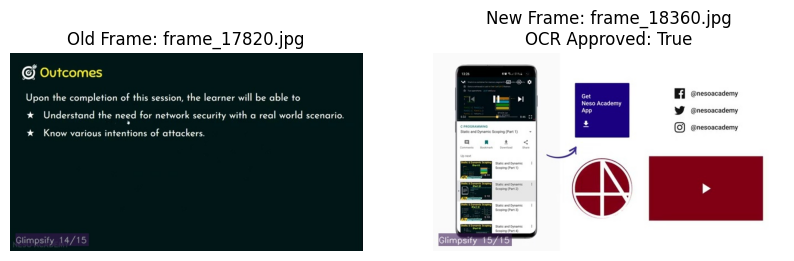

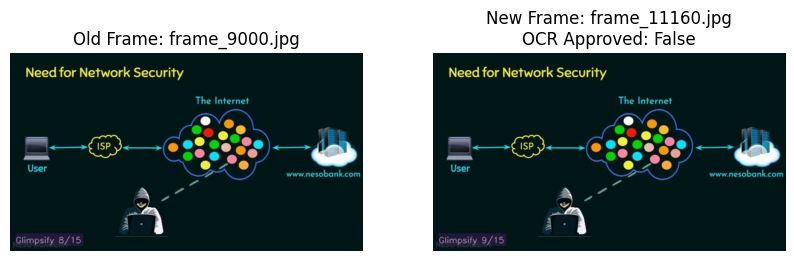

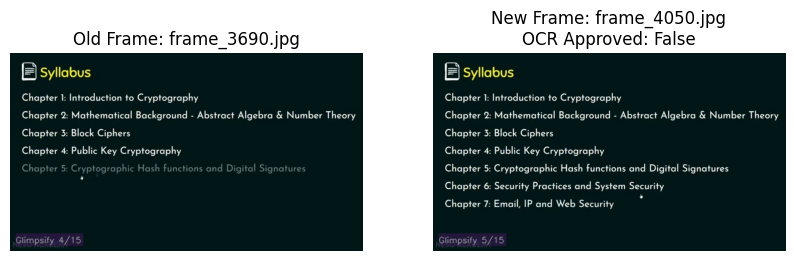

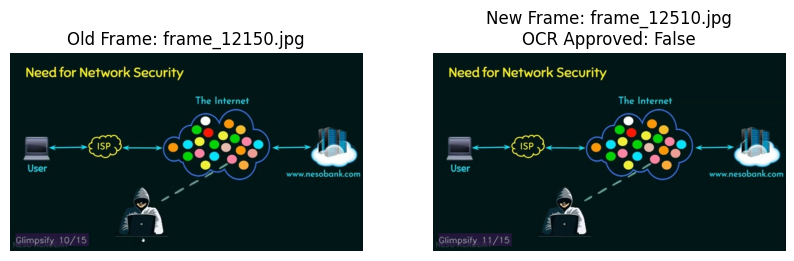

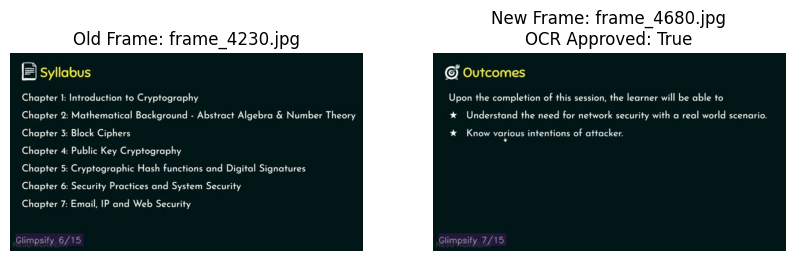

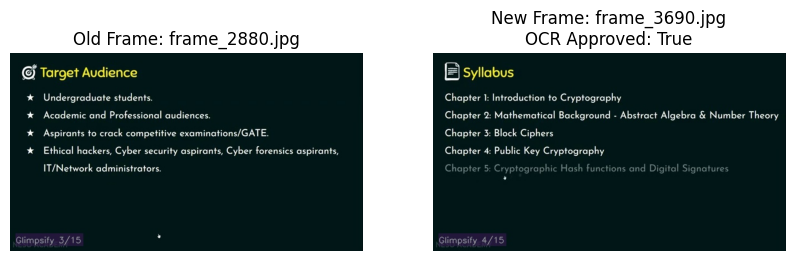

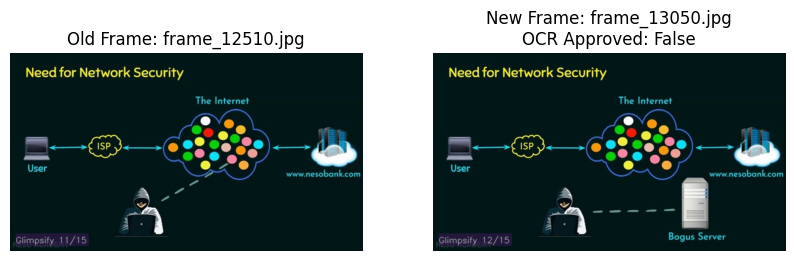

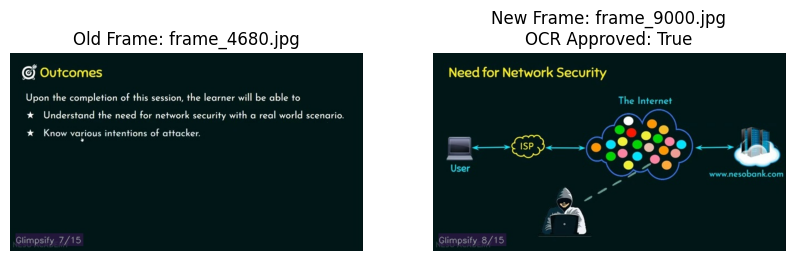

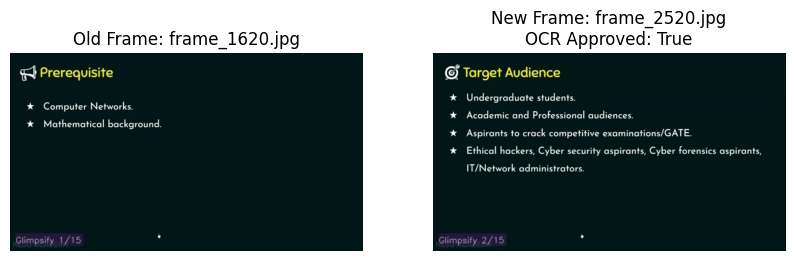

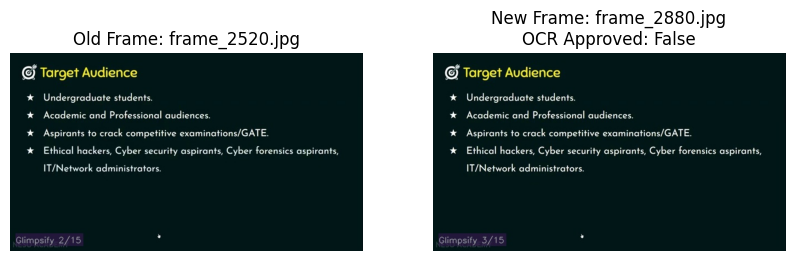

In [18]:
import matplotlib.pyplot as plt

df_sample = df.sample(10)

for index, row in df_sample.iterrows():
    new_frame_path = os.path.join(directory, row['new_frame'])
    old_frame_path = os.path.join(directory, row['old_frame'])
    
    new_frame = cv2.imread(new_frame_path)
    old_frame = cv2.imread(old_frame_path)
    
    is_ocr_approved = row['is_ocr_approved']
    
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(cv2.cvtColor(old_frame, cv2.COLOR_BGR2RGB))
    axes[0].set_title(f"Old Frame: {row['old_frame']}")
    axes[0].axis('off')
    
    axes[1].imshow(cv2.cvtColor(new_frame, cv2.COLOR_BGR2RGB))
    axes[1].set_title(f"New Frame: {row['new_frame']}\nOCR Approved: {is_ocr_approved}")
    axes[1].axis('off')
    
    plt.show()

This should have been approved

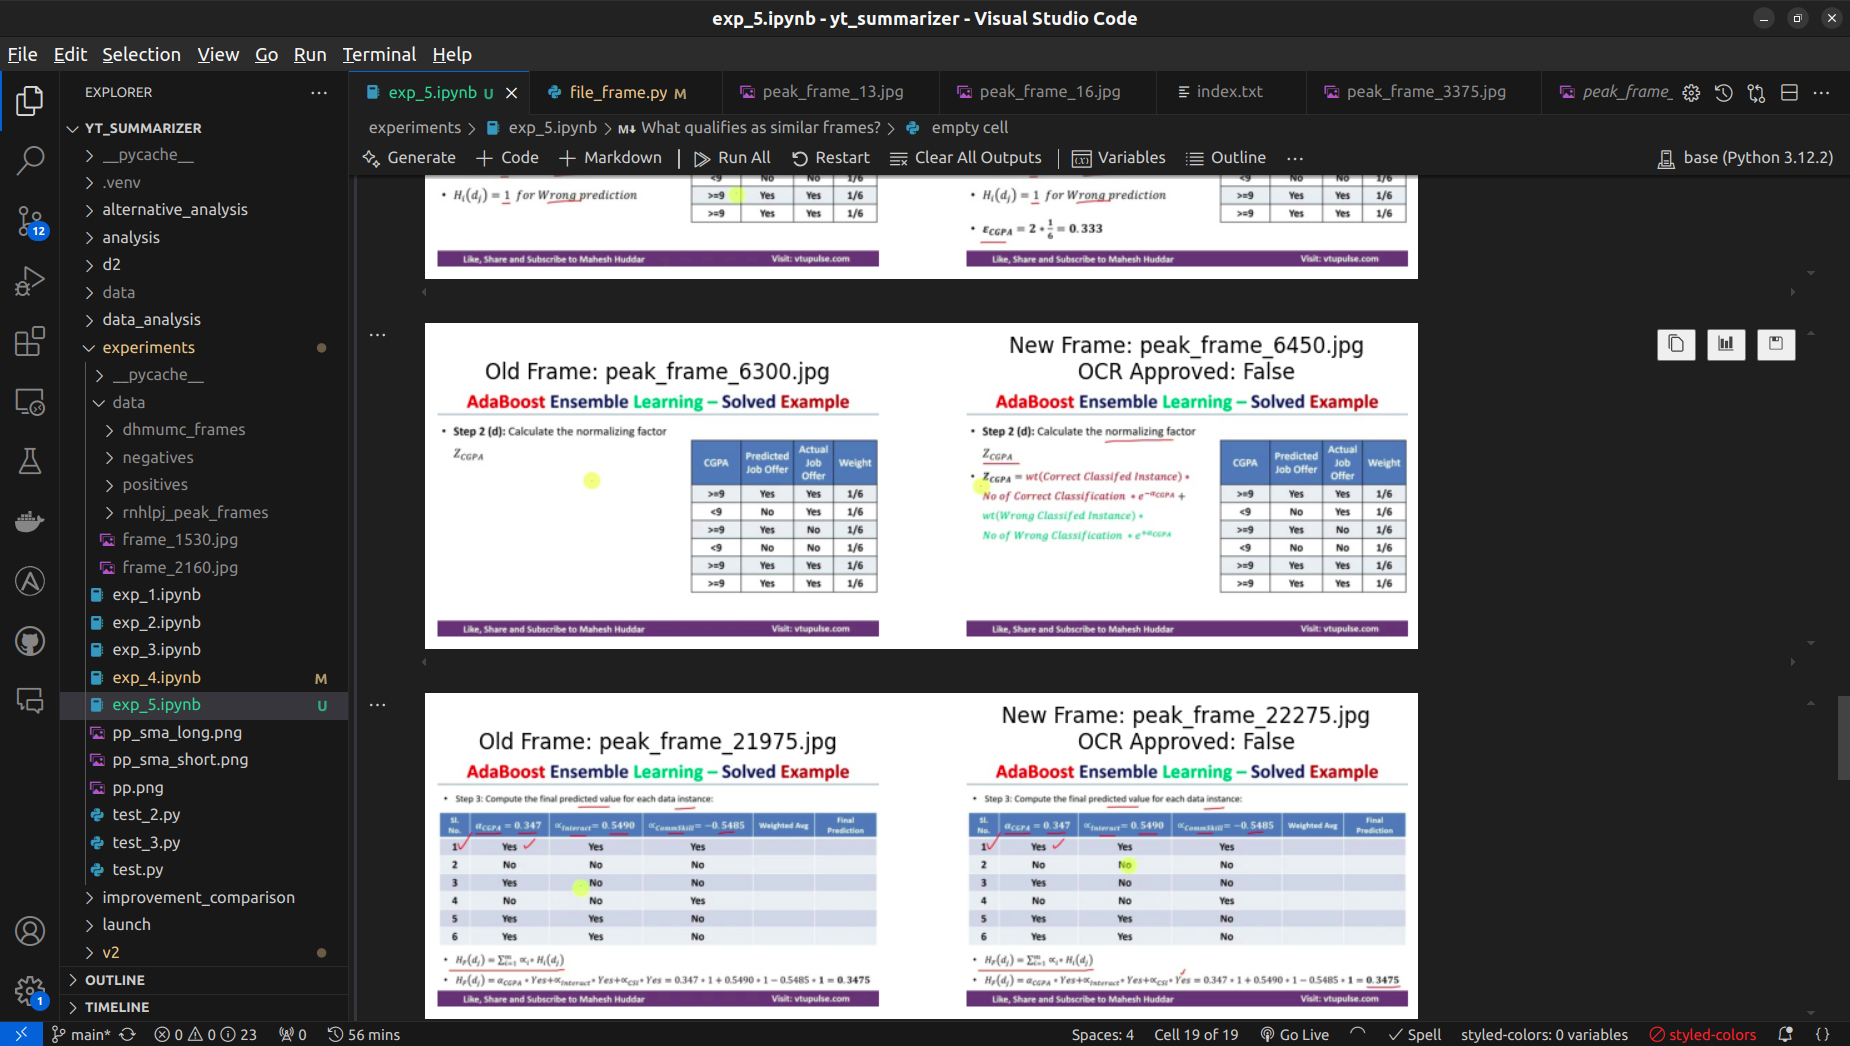

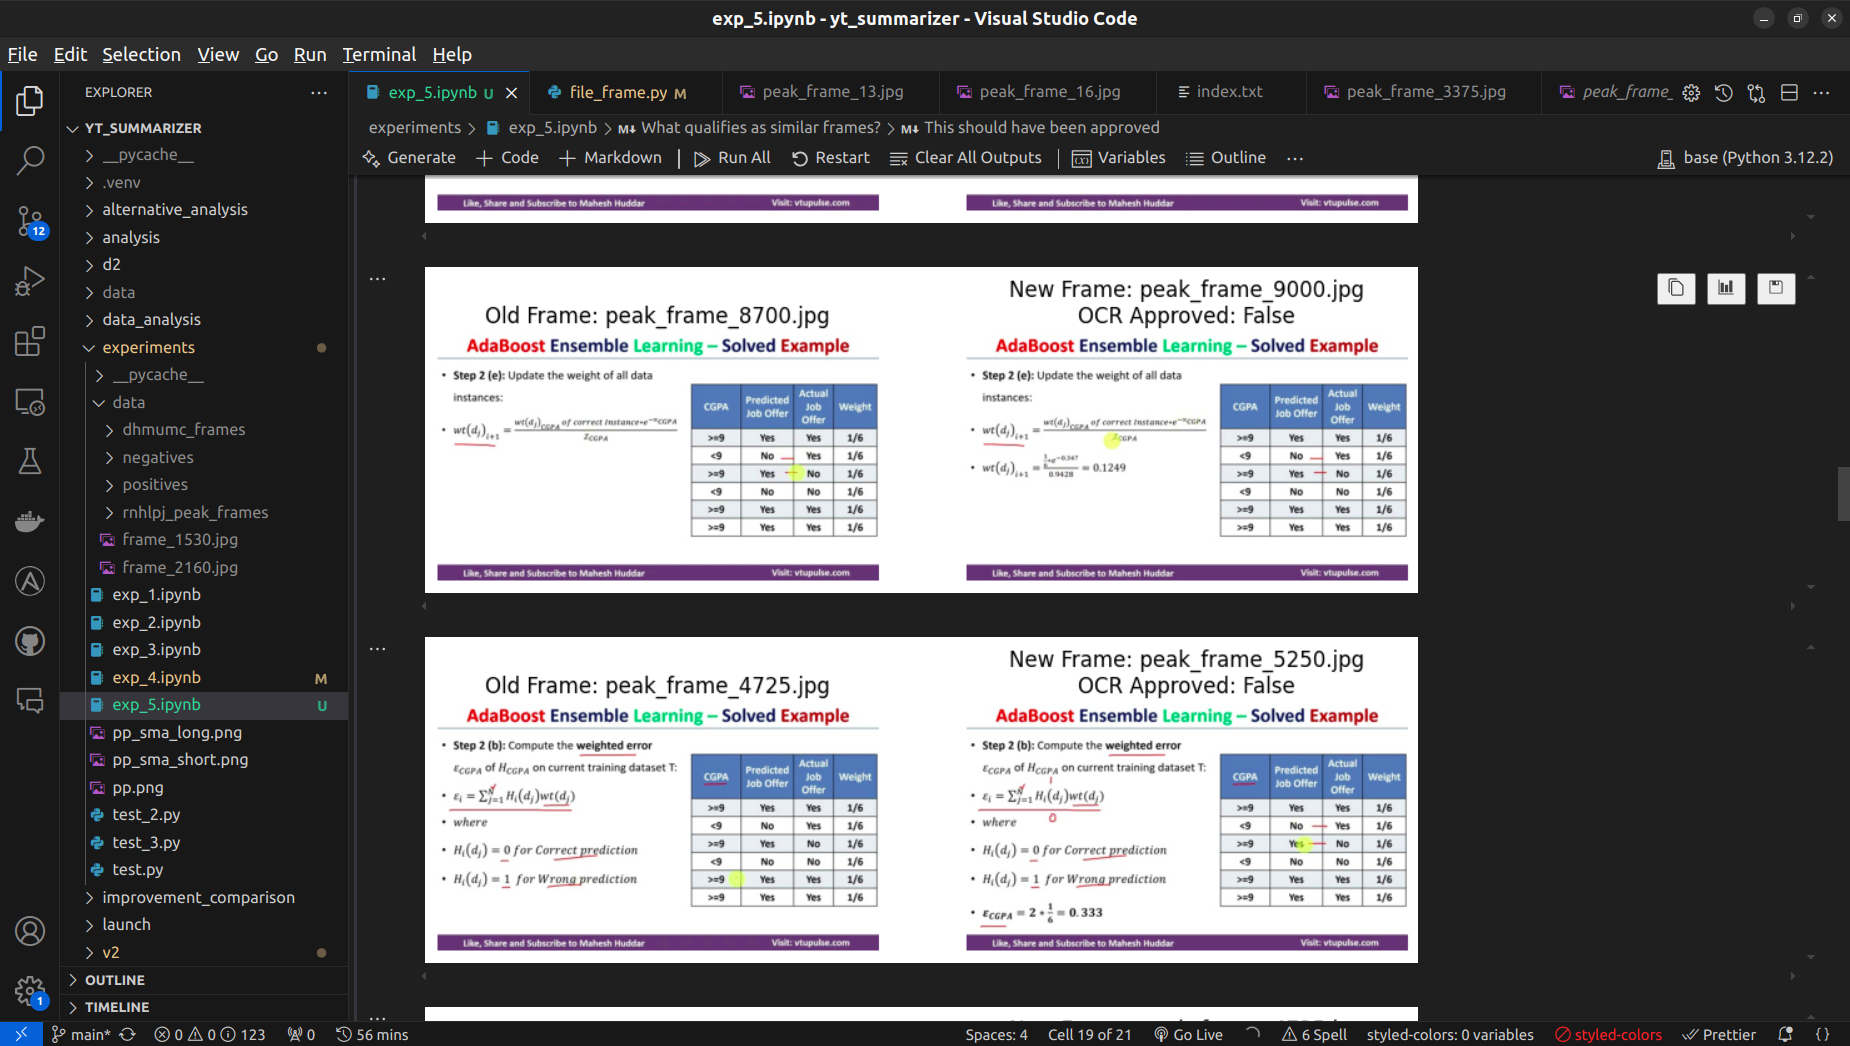